In [1]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
# Read Data
data = pd.read_csv('Data/requiredMunicipalities_temperature_precipitation_elevation_DengueCasesWeek.csv')
# Remove extra column
data = data.drop('Unnamed: 0', 1)

In [3]:
data.head()

,State,Municipality,PRECIPITATION_jan_07,PRECIPITATION_feb_07,PRECIPITATION_mar_07,PRECIPITATION_apr_07,PRECIPITATION_may_07,PRECIPITATION_jun_07,PRECIPITATION_jul_07,PRECIPITATION_aug_07,...,2019/w43,2019/w44,2019/w45,2019/w46,2019/w47,2019/w48,2019/w49,2019/w50,2019/w51,2019/w52
0,antioquia,alejandria,66.638855,66.628891,199.928375,286.881470,345.874695,161.073792,339.436737,324.082489,...,0,0,0,0,0,0,0,0,0,0
1,antioquia,amaga,62.527489,46.315376,166.522003,288.957397,350.666260,143.757507,350.168793,210.302658,...,0,0,0,0,0,1,1,1,0,0
2,antioquia,amalfi,76.737572,62.784908,198.478897,322.928314,381.405701,191.377609,387.475983,408.289520,...,0,0,0,0,0,0,0,0,1,0
3,antioquia,andes,115.193504,61.572941,205.126846,308.268433,332.884583,116.664536,310.750671,189.581451,...,0,0,0,0,1,0,0,0,0,0
4,antioquia,angelopolis,69.933151,43.129227,178.370377,278.665588,326.885010,144.349655,360.914429,234.040939,...,0,0,0,0,0,0,0,0,0,0


## Columns with temperature, precipitation, and Dengue Cases

In [4]:
# Take just temperature data
x_temperature = data[data.columns[147:291]]
x_temperature.head()

,TEMPERATURE_jan_07,TEMPERATURE_feb_07,TEMPERATURE_mar_07,TEMPERATURE_apr_07,TEMPERATURE_may_07,TEMPERATURE_jun_07,TEMPERATURE_jul_07,TEMPERATURE_aug_07,TEMPERATURE_sep_07,TEMPERATURE_oct_07,...,TEMPERATURE_mar_18,TEMPERATURE_apr_18,TEMPERATURE_may_18,TEMPERATURE_jun_18,TEMPERATURE_jul_18,TEMPERATURE_aug_18,TEMPERATURE_sep_18,TEMPERATURE_oct_18,TEMPERATURE_nov_18,TEMPERATURE_dec_18
0,20.606707,20.672624,21.210392,21.113854,21.331241,21.114738,21.333450,20.634999,20.499266,19.855212,...,21.489558,20.985991,21.025772,21.377411,21.652374,21.425886,21.230342,20.725872,20.687894,20.574121
1,20.814870,20.851651,21.328261,21.144019,21.174519,20.900712,21.281823,20.447760,20.407709,19.706597,...,21.648314,21.020582,20.880769,21.149931,21.560988,21.380573,21.026458,20.558420,20.625113,20.717262
2,21.520126,21.536331,22.240293,22.223073,22.306279,22.010652,22.411260,21.424171,21.347958,20.695219,...,22.440292,22.133230,21.910445,22.177232,22.709351,22.234674,22.014884,21.497476,21.550504,21.471094
3,17.030849,16.976915,17.263741,17.063804,17.199818,17.035077,17.151788,16.501156,16.793839,15.996531,...,17.669470,16.954950,16.968828,17.341847,17.520799,17.428500,17.365973,16.974917,17.126363,17.195797
4,20.095986,20.092206,20.527178,20.310996,20.335141,20.198780,20.571788,19.733009,19.727717,19.003105,...,20.841154,20.195543,20.037224,20.429421,20.838454,20.657140,20.333967,19.815866,19.987836,20.030714


In [5]:
# Take just precipitation data
x_precipitation = data[data.columns[2:146]]
x_precipitation.head()

,PRECIPITATION_jan_07,PRECIPITATION_feb_07,PRECIPITATION_mar_07,PRECIPITATION_apr_07,PRECIPITATION_may_07,PRECIPITATION_jun_07,PRECIPITATION_jul_07,PRECIPITATION_aug_07,PRECIPITATION_sep_07,PRECIPITATION_oct_07,...,PRECIPITATION_mar_18,PRECIPITATION_apr_18,PRECIPITATION_may_18,PRECIPITATION_jun_18,PRECIPITATION_jul_18,PRECIPITATION_aug_18,PRECIPITATION_sep_18,PRECIPITATION_oct_18,PRECIPITATION_nov_18,PRECIPITATION_dec_18
0,66.638855,66.628891,199.928375,286.881470,345.874695,161.073792,339.436737,324.082489,243.856186,361.769562,...,147.506775,292.958588,436.878143,225.225449,195.619019,256.421906,302.413086,353.701385,277.470184,61.464046
1,62.527489,46.315376,166.522003,288.957397,350.666260,143.757507,350.168793,210.302658,214.617142,283.321747,...,117.747261,256.695129,421.436859,195.391815,162.015167,182.192062,274.654327,259.078125,282.538574,68.923813
2,76.737572,62.784908,198.478897,322.928314,381.405701,191.377609,387.475983,408.289520,306.408356,385.371216,...,164.738312,349.761841,433.156830,264.976685,236.360321,286.805847,330.032654,388.256378,315.904602,71.508133
3,115.193504,61.572941,205.126846,308.268433,332.884583,116.664536,310.750671,189.581451,194.997574,333.450806,...,144.462082,262.342285,394.904175,158.639008,142.633423,161.990524,246.869614,293.866364,298.362244,85.697762
4,69.933151,43.129227,178.370377,278.665588,326.885010,144.349655,360.914429,234.040939,214.994553,291.776550,...,126.783783,247.130173,390.748199,197.610321,163.057632,205.655136,273.291779,268.090820,284.551331,67.718147


In [6]:
# Take Columns of weekly cases (week 1 2007 - week 52 2018)
y_data = data[data.columns[343:-52]]
y_data.head()

,2007/w01,2007/w02,2007/w03,2007/w04,2007/w05,2007/w06,2007/w07,2007/w08,2007/w09,2007/w10,...,2018/w43,2018/w44,2018/w45,2018/w46,2018/w47,2018/w48,2018/w49,2018/w50,2018/w51,2018/w52
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Temperature, Percipitation and Dengue Cases weekly 2007-2018 for Medellin

# Data Pre-Processing

Temperature, Percipitation, Cases for Medellin from original data  (sivigila - cases) (google earth engine - precipitation and worldclim - temperature)

In [7]:
# Take just the row of Medellin from original dataframe
data_medellin = data[data.Municipality=='medellin']
data_medellin

,State,Municipality,PRECIPITATION_jan_07,PRECIPITATION_feb_07,PRECIPITATION_mar_07,PRECIPITATION_apr_07,PRECIPITATION_may_07,PRECIPITATION_jun_07,PRECIPITATION_jul_07,PRECIPITATION_aug_07,...,2019/w43,2019/w44,2019/w45,2019/w46,2019/w47,2019/w48,2019/w49,2019/w50,2019/w51,2019/w52
62,antioquia,medellin,65.4114,49.307404,195.452469,291.927124,345.532501,157.963028,386.515533,230.007416,...,29,17,35,16,21,15,20,30,14,5


### PRECIPITATION DATA

In [8]:
# Take the columns of precipitation for Medellin
x_precipitation_medellin = data_medellin[data_medellin.columns[2:146]]
x_precipitation_medellin

,PRECIPITATION_jan_07,PRECIPITATION_feb_07,PRECIPITATION_mar_07,PRECIPITATION_apr_07,PRECIPITATION_may_07,PRECIPITATION_jun_07,PRECIPITATION_jul_07,PRECIPITATION_aug_07,PRECIPITATION_sep_07,PRECIPITATION_oct_07,...,PRECIPITATION_mar_18,PRECIPITATION_apr_18,PRECIPITATION_may_18,PRECIPITATION_jun_18,PRECIPITATION_jul_18,PRECIPITATION_aug_18,PRECIPITATION_sep_18,PRECIPITATION_oct_18,PRECIPITATION_nov_18,PRECIPITATION_dec_18
62,65.4114,49.307404,195.452469,291.927124,345.532501,157.963028,386.515533,230.007416,234.679382,320.92984,...,140.323318,267.799438,418.379303,219.436752,180.841248,200.803131,294.888611,302.151306,276.914551,67.528


In [9]:
# Transpose the row to a Column of precipitation for Medellin
x_precipitation_medellin_transposed = x_precipitation_medellin.T
x_precipitation_medellin_transposed = x_precipitation_medellin_transposed.rename(columns= {62:'percipitation_medellin'})  ##integer
x_precipitation_medellin_transposed

,percipitation_medellin
PRECIPITATION_jan_07,65.411400
PRECIPITATION_feb_07,49.307404
PRECIPITATION_mar_07,195.452469
PRECIPITATION_apr_07,291.927124
PRECIPITATION_may_07,345.532501
...,...
PRECIPITATION_aug_18,200.803131
PRECIPITATION_sep_18,294.888611
PRECIPITATION_oct_18,302.151306
PRECIPITATION_nov_18,276.914551


## Get date of precipitation from index 

In [10]:
#Create a new column of date
x_precipitation_medellin_transposed['DATE']=x_precipitation_medellin_transposed.index.str.split("_")
x_precipitation_medellin_transposed

,percipitation_medellin,DATE
PRECIPITATION_jan_07,65.411400,"[PRECIPITATION, jan, 07]"
PRECIPITATION_feb_07,49.307404,"[PRECIPITATION, feb, 07]"
PRECIPITATION_mar_07,195.452469,"[PRECIPITATION, mar, 07]"
PRECIPITATION_apr_07,291.927124,"[PRECIPITATION, apr, 07]"
PRECIPITATION_may_07,345.532501,"[PRECIPITATION, may, 07]"
...,...,...
PRECIPITATION_aug_18,200.803131,"[PRECIPITATION, aug, 18]"
PRECIPITATION_sep_18,294.888611,"[PRECIPITATION, sep, 18]"
PRECIPITATION_oct_18,302.151306,"[PRECIPITATION, oct, 18]"
PRECIPITATION_nov_18,276.914551,"[PRECIPITATION, nov, 18]"


In [11]:
#get year from date column
x_precipitation_medellin_transposed['YEAR'] = x_precipitation_medellin_transposed['DATE'].apply(lambda x: "20" + x[2])  
x_precipitation_medellin_transposed.head()

,percipitation_medellin,DATE,YEAR
PRECIPITATION_jan_07,65.411400,"[PRECIPITATION, jan, 07]",2007
PRECIPITATION_feb_07,49.307404,"[PRECIPITATION, feb, 07]",2007
PRECIPITATION_mar_07,195.452469,"[PRECIPITATION, mar, 07]",2007
PRECIPITATION_apr_07,291.927124,"[PRECIPITATION, apr, 07]",2007
PRECIPITATION_may_07,345.532501,"[PRECIPITATION, may, 07]",2007


In [12]:
#get year from month column
x_precipitation_medellin_transposed['MONTH'] = x_precipitation_medellin_transposed['DATE'].apply(lambda x: x[1])  
x_precipitation_medellin_transposed.head()

,percipitation_medellin,DATE,YEAR,MONTH
PRECIPITATION_jan_07,65.411400,"[PRECIPITATION, jan, 07]",2007,jan
PRECIPITATION_feb_07,49.307404,"[PRECIPITATION, feb, 07]",2007,feb
PRECIPITATION_mar_07,195.452469,"[PRECIPITATION, mar, 07]",2007,mar
PRECIPITATION_apr_07,291.927124,"[PRECIPITATION, apr, 07]",2007,apr
PRECIPITATION_may_07,345.532501,"[PRECIPITATION, may, 07]",2007,may


In [13]:
## function to change month as int to numeric
def month_as_int(month):
  if month == 'jan':
    return '01'
  if month == 'feb':
    return '02' 
  if month == 'mar':
    return '03'
  if month == 'apr':
    return '04' 
  if month == 'may':
    return '05'
  if month == 'jun':
    return '06' 
  if month == 'jul':
    return '07'
  if month == 'aug':
    return '08' 
  if month == 'sep':
    return '09'
  if month == 'oct':
    return '10' 
  if month == 'nov':
    return '11'   
  if month == 'dec':
    return '12'


In [14]:
x_precipitation_medellin_transposed

,percipitation_medellin,DATE,YEAR,MONTH
PRECIPITATION_jan_07,65.411400,"[PRECIPITATION, jan, 07]",2007,jan
PRECIPITATION_feb_07,49.307404,"[PRECIPITATION, feb, 07]",2007,feb
PRECIPITATION_mar_07,195.452469,"[PRECIPITATION, mar, 07]",2007,mar
PRECIPITATION_apr_07,291.927124,"[PRECIPITATION, apr, 07]",2007,apr
PRECIPITATION_may_07,345.532501,"[PRECIPITATION, may, 07]",2007,may
...,...,...,...,...
PRECIPITATION_aug_18,200.803131,"[PRECIPITATION, aug, 18]",2018,aug
PRECIPITATION_sep_18,294.888611,"[PRECIPITATION, sep, 18]",2018,sep
PRECIPITATION_oct_18,302.151306,"[PRECIPITATION, oct, 18]",2018,oct
PRECIPITATION_nov_18,276.914551,"[PRECIPITATION, nov, 18]",2018,nov


In [15]:
#change the month from jan to 01 and apply to every row in the df
x_precipitation_medellin_transposed['MONTH'] = x_precipitation_medellin_transposed['MONTH'].apply(lambda x: month_as_int(month=x.strip()))
x_precipitation_medellin_transposed.head()

,percipitation_medellin,DATE,YEAR,MONTH
PRECIPITATION_jan_07,65.411400,"[PRECIPITATION, jan, 07]",2007,01
PRECIPITATION_feb_07,49.307404,"[PRECIPITATION, feb, 07]",2007,02
PRECIPITATION_mar_07,195.452469,"[PRECIPITATION, mar, 07]",2007,03
PRECIPITATION_apr_07,291.927124,"[PRECIPITATION, apr, 07]",2007,04
PRECIPITATION_may_07,345.532501,"[PRECIPITATION, may, 07]",2007,05


In [16]:
x_precipitation_medellin_transposed['MONTH']=x_precipitation_medellin_transposed['MONTH'].astype(int)

### TEMPERATURE DATA

In [17]:
# Take the columns of temperature for Medellin
x_temperature_medellin = data_medellin[data_medellin.columns[147:291]]
x_temperature_medellin.head()

,TEMPERATURE_jan_07,TEMPERATURE_feb_07,TEMPERATURE_mar_07,TEMPERATURE_apr_07,TEMPERATURE_may_07,TEMPERATURE_jun_07,TEMPERATURE_jul_07,TEMPERATURE_aug_07,TEMPERATURE_sep_07,TEMPERATURE_oct_07,...,TEMPERATURE_mar_18,TEMPERATURE_apr_18,TEMPERATURE_may_18,TEMPERATURE_jun_18,TEMPERATURE_jul_18,TEMPERATURE_aug_18,TEMPERATURE_sep_18,TEMPERATURE_oct_18,TEMPERATURE_nov_18,TEMPERATURE_dec_18
62,21.009283,20.982925,21.425911,21.237032,21.322522,21.243176,21.686978,20.866394,20.705536,19.954406,...,21.726171,21.124271,21.037365,21.457151,21.952168,21.719432,21.347202,20.748416,20.886703,20.936353


In [18]:
# Transpose the row to a Column of temperature for Medellin
x_temperature_medellin_transposed = x_temperature_medellin.T
x_temperature_medellin_transposed = x_temperature_medellin_transposed.rename(columns= {62:'temperature_medellin'})  ##integer
x_temperature_medellin_transposed

,temperature_medellin
TEMPERATURE_jan_07,21.009283
TEMPERATURE_feb_07,20.982925
TEMPERATURE_mar_07,21.425911
TEMPERATURE_apr_07,21.237032
TEMPERATURE_may_07,21.322522
...,...
TEMPERATURE_aug_18,21.719432
TEMPERATURE_sep_18,21.347202
TEMPERATURE_oct_18,20.748416
TEMPERATURE_nov_18,20.886703


## Get date of temperature from index 

In [19]:
# Create a new column of date
x_temperature_medellin_transposed['DATE']=x_temperature_medellin_transposed.index.str.split("_")
x_temperature_medellin_transposed

,temperature_medellin,DATE
TEMPERATURE_jan_07,21.009283,"[TEMPERATURE, jan, 07]"
TEMPERATURE_feb_07,20.982925,"[TEMPERATURE, feb, 07]"
TEMPERATURE_mar_07,21.425911,"[TEMPERATURE, mar, 07]"
TEMPERATURE_apr_07,21.237032,"[TEMPERATURE, apr, 07]"
TEMPERATURE_may_07,21.322522,"[TEMPERATURE, may, 07]"
...,...,...
TEMPERATURE_aug_18,21.719432,"[TEMPERATURE, aug, 18]"
TEMPERATURE_sep_18,21.347202,"[TEMPERATURE, sep, 18]"
TEMPERATURE_oct_18,20.748416,"[TEMPERATURE, oct, 18]"
TEMPERATURE_nov_18,20.886703,"[TEMPERATURE, nov, 18]"


In [20]:
# Get year from date column
x_temperature_medellin_transposed['YEAR'] = x_temperature_medellin_transposed['DATE'].apply(lambda x: "20" + x[2])  
x_temperature_medellin_transposed.head()

,temperature_medellin,DATE,YEAR
TEMPERATURE_jan_07,21.009283,"[TEMPERATURE, jan, 07]",2007
TEMPERATURE_feb_07,20.982925,"[TEMPERATURE, feb, 07]",2007
TEMPERATURE_mar_07,21.425911,"[TEMPERATURE, mar, 07]",2007
TEMPERATURE_apr_07,21.237032,"[TEMPERATURE, apr, 07]",2007
TEMPERATURE_may_07,21.322522,"[TEMPERATURE, may, 07]",2007


In [21]:
# Get month from date column
x_temperature_medellin_transposed['MONTH'] = x_temperature_medellin_transposed['DATE'].apply(lambda x: x[1])  
x_temperature_medellin_transposed.head()

,temperature_medellin,DATE,YEAR,MONTH
TEMPERATURE_jan_07,21.009283,"[TEMPERATURE, jan, 07]",2007,jan
TEMPERATURE_feb_07,20.982925,"[TEMPERATURE, feb, 07]",2007,feb
TEMPERATURE_mar_07,21.425911,"[TEMPERATURE, mar, 07]",2007,mar
TEMPERATURE_apr_07,21.237032,"[TEMPERATURE, apr, 07]",2007,apr
TEMPERATURE_may_07,21.322522,"[TEMPERATURE, may, 07]",2007,may


In [22]:
#change the month from jan to 01 and apply to every row in the df
x_temperature_medellin_transposed['MONTH'] = x_temperature_medellin_transposed['MONTH'].apply(lambda x: month_as_int(month=x.strip()))
x_temperature_medellin_transposed.head()

,temperature_medellin,DATE,YEAR,MONTH
TEMPERATURE_jan_07,21.009283,"[TEMPERATURE, jan, 07]",2007,01
TEMPERATURE_feb_07,20.982925,"[TEMPERATURE, feb, 07]",2007,02
TEMPERATURE_mar_07,21.425911,"[TEMPERATURE, mar, 07]",2007,03
TEMPERATURE_apr_07,21.237032,"[TEMPERATURE, apr, 07]",2007,04
TEMPERATURE_may_07,21.322522,"[TEMPERATURE, may, 07]",2007,05


In [23]:
x_temperature_medellin_transposed['MONTH'] = x_temperature_medellin_transposed['MONTH'].astype(int)

## Dengue Cases

In [24]:
# Take columns of Dengue cases from Medellin data
x_cases_medellin = data_medellin[data_medellin.columns[343:-52]]
# convert to Row
x_cases_transposed_medellin = x_cases_medellin.T
# Rename Column
x_cases_transposed_medellin = x_cases_transposed_medellin.rename(columns= {62:'cases_medellin'})  ##integer
x_cases_transposed_medellin

,cases_medellin
2007/w01,1
2007/w02,0
2007/w03,0
2007/w04,0
2007/w05,0
...,...
2018/w48,28
2018/w49,12
2018/w50,27
2018/w51,17


## Date of Dengue Cases

In [25]:
# Create new Column
x_cases_transposed_medellin['DATA'] = x_cases_transposed_medellin.index.str.split('/')  #index column split function though works on string only -> yyyy week
x_cases_transposed_medellin

,cases_medellin,DATA
2007/w01,1,"[2007, w01]"
2007/w02,0,"[2007, w02]"
2007/w03,0,"[2007, w03]"
2007/w04,0,"[2007, w04]"
2007/w05,0,"[2007, w05]"
...,...,...
2018/w48,28,"[2018, w48]"
2018/w49,12,"[2018, w49]"
2018/w50,27,"[2018, w50]"
2018/w51,17,"[2018, w51]"


In [26]:
# Take year
x_cases_transposed_medellin['YEAR'] = x_cases_transposed_medellin['DATA'].apply(lambda x: x[0])
x_cases_transposed_medellin

,cases_medellin,DATA,YEAR
2007/w01,1,"[2007, w01]",2007
2007/w02,0,"[2007, w02]",2007
2007/w03,0,"[2007, w03]",2007
2007/w04,0,"[2007, w04]",2007
2007/w05,0,"[2007, w05]",2007
...,...,...,...
2018/w48,28,"[2018, w48]",2018
2018/w49,12,"[2018, w49]",2018
2018/w50,27,"[2018, w50]",2018
2018/w51,17,"[2018, w51]",2018


In [27]:
# Convert to format year + week 
x_cases_transposed_medellin['YearWeek'] = x_cases_transposed_medellin['DATA'].apply(lambda x: x[0] + x[1].split('w')[1])  ##concate year and week index 0 and 1 in a list and apply to all rows
x_cases_transposed_medellin

,cases_medellin,DATA,YEAR,YearWeek
2007/w01,1,"[2007, w01]",2007,200701
2007/w02,0,"[2007, w02]",2007,200702
2007/w03,0,"[2007, w03]",2007,200703
2007/w04,0,"[2007, w04]",2007,200704
2007/w05,0,"[2007, w05]",2007,200705
...,...,...,...,...
2018/w48,28,"[2018, w48]",2018,201848
2018/w49,12,"[2018, w49]",2018,201849
2018/w50,27,"[2018, w50]",2018,201850
2018/w51,17,"[2018, w51]",2018,201851


In [28]:
#YearWeekInt --> changed to int
x_cases_transposed_medellin['YearWeek'] = x_cases_transposed_medellin['YearWeek'].astype(int)
x_cases_transposed_medellin.head()  #integer

,cases_medellin,DATA,YEAR,YearWeek
2007/w01,1,"[2007, w01]",2007,200701
2007/w02,0,"[2007, w02]",2007,200702
2007/w03,0,"[2007, w03]",2007,200703
2007/w04,0,"[2007, w04]",2007,200704
2007/w05,0,"[2007, w05]",2007,200705


In [29]:
x_cases_transposed_medellin['LastDayWeek'] = pd.to_datetime((x_cases_transposed_medellin['YearWeek']-1).astype(str) + "6" , format="%Y%U%w")   # 200701 + 6 -> yearweeknumber + Lastday of week 
##-1 -> our data weeknumber e.g. Yearweek 200701 yearweek starts from 01 as week 1 and datatime library starts from 00 as week 1 -> 1 -52 weeks data -> 0-51 weeks datelibrary
## %Uweek number 0 51 = 1 52  
##%w last day of week    This is taken from epiweek (1st epi week of 2007 starts 31-Dec-2016 ends 6-Jan-2017) 
##Library takes in yearweeknumber + weekday  -> the date form the last day of the week 
x_cases_transposed_medellin

,cases_medellin,DATA,YEAR,YearWeek,LastDayWeek
2007/w01,1,"[2007, w01]",2007,200701,2007-01-06
2007/w02,0,"[2007, w02]",2007,200702,2007-01-13
2007/w03,0,"[2007, w03]",2007,200703,2007-01-20
2007/w04,0,"[2007, w04]",2007,200704,2007-01-27
2007/w05,0,"[2007, w05]",2007,200705,2007-02-03
...,...,...,...,...,...
2018/w48,28,"[2018, w48]",2018,201848,2018-12-01
2018/w49,12,"[2018, w49]",2018,201849,2018-12-08
2018/w50,27,"[2018, w50]",2018,201850,2018-12-15
2018/w51,17,"[2018, w51]",2018,201851,2018-12-22


In [30]:
# Take month to append and duplicate temperature and precipitation
x_cases_transposed_medellin['MONTH'] = pd.DatetimeIndex(x_cases_transposed_medellin['LastDayWeek']).month  
x_cases_transposed_medellin    ##w5 Jan 2days , Feb 5 days --> MonthMax --> the month for the last day of the week --> Feb wins!

,cases_medellin,DATA,YEAR,YearWeek,LastDayWeek,MONTH
2007/w01,1,"[2007, w01]",2007,200701,2007-01-06,1
2007/w02,0,"[2007, w02]",2007,200702,2007-01-13,1
2007/w03,0,"[2007, w03]",2007,200703,2007-01-20,1
2007/w04,0,"[2007, w04]",2007,200704,2007-01-27,1
2007/w05,0,"[2007, w05]",2007,200705,2007-02-03,2
...,...,...,...,...,...,...
2018/w48,28,"[2018, w48]",2018,201848,2018-12-01,12
2018/w49,12,"[2018, w49]",2018,201849,2018-12-08,12
2018/w50,27,"[2018, w50]",2018,201850,2018-12-15,12
2018/w51,17,"[2018, w51]",2018,201851,2018-12-22,12


### JOIN TEMPERATURE AND CASES AND PRECIPITATION

In [31]:
merge_cases_temp = pd.merge(x_cases_transposed_medellin,x_temperature_medellin_transposed, on=['MONTH','YEAR'],how ='left')  ##month and year pair match , to avoid duplicate for each month or year it matches with
merge_cases_temp

,cases_medellin,DATA,YEAR,YearWeek,LastDayWeek,MONTH,temperature_medellin,DATE
0,1,"[2007, w01]",2007,200701,2007-01-06,1,21.009283,"[TEMPERATURE, jan, 07]"
1,0,"[2007, w02]",2007,200702,2007-01-13,1,21.009283,"[TEMPERATURE, jan, 07]"
2,0,"[2007, w03]",2007,200703,2007-01-20,1,21.009283,"[TEMPERATURE, jan, 07]"
3,0,"[2007, w04]",2007,200704,2007-01-27,1,21.009283,"[TEMPERATURE, jan, 07]"
4,0,"[2007, w05]",2007,200705,2007-02-03,2,20.982925,"[TEMPERATURE, feb, 07]"
...,...,...,...,...,...,...,...,...
619,28,"[2018, w48]",2018,201848,2018-12-01,12,20.936353,"[TEMPERATURE, dec, 18]"
620,12,"[2018, w49]",2018,201849,2018-12-08,12,20.936353,"[TEMPERATURE, dec, 18]"
621,27,"[2018, w50]",2018,201850,2018-12-15,12,20.936353,"[TEMPERATURE, dec, 18]"
622,17,"[2018, w51]",2018,201851,2018-12-22,12,20.936353,"[TEMPERATURE, dec, 18]"


In [32]:
# Marge and duplicate precipitaton data
#merge_cases_temp_precip = pd.merge(merge_cases_temp,x_precipitation_medellin_transposed, on=['MONTH','YEAR'],how ='left')  ##month and year pair match , to avoid duplicate for each month or year it matches with
#merge_cases_temp_precip

# Load new weekly precipitation data

In [33]:
data_prec_weekly = pd.read_csv('Data/Datos_prec_semanal.csv')
# Rename extra column
data_prec_weekly = data_prec_weekly.rename({'Unnamed: 0': 'LastDayWeek', 'Medellin':'percipitation_medellin', 'MedellinRural':'percipitation_medellin_rural', 'MedellinUrbano':'percipitation_medellin_urbano'}, axis=1)
data_prec_weekly.head()

,LastDayWeek,percipitation_medellin,percipitation_medellin_rural,percipitation_medellin_urbano
0,2007-01-06,13.096688,14.097693,12.628933
1,2007-01-13,8.437044,6.910390,9.067214
2,2007-01-20,19.373165,21.616968,18.406665
3,2007-01-27,0.000000,0.000000,0.000000
4,2007-02-03,3.725206,3.144225,3.901021


In [34]:
data_prec_weekly.LastDayWeek = pd.to_datetime(data_prec_weekly.LastDayWeek)
data_prec_weekly.dtypes

LastDayWeek                      datetime64[ns]
percipitation_medellin                  float64
percipitation_medellin_rural            float64
percipitation_medellin_urbano           float64
dtype: object

### merge new precipitaton data

In [37]:
merge_cases_temp_precip = pd.merge(merge_cases_temp, data_prec_weekly, on=['LastDayWeek'],how ='left')  ##month and year pair match , to avoid duplicate for each month or year it matches with
merge_cases_temp_precip

,cases_medellin,DATA,YEAR,YearWeek,LastDayWeek,MONTH,temperature_medellin,DATE,percipitation_medellin,percipitation_medellin_rural,percipitation_medellin_urbano
0,1,"[2007, w01]",2007,200701,2007-01-06,1,21.009283,"[TEMPERATURE, jan, 07]",13.096688,14.097693,12.628933
1,0,"[2007, w02]",2007,200702,2007-01-13,1,21.009283,"[TEMPERATURE, jan, 07]",8.437044,6.910390,9.067214
2,0,"[2007, w03]",2007,200703,2007-01-20,1,21.009283,"[TEMPERATURE, jan, 07]",19.373165,21.616968,18.406665
3,0,"[2007, w04]",2007,200704,2007-01-27,1,21.009283,"[TEMPERATURE, jan, 07]",0.000000,0.000000,0.000000
4,0,"[2007, w05]",2007,200705,2007-02-03,2,20.982925,"[TEMPERATURE, feb, 07]",3.725206,3.144225,3.901021
...,...,...,...,...,...,...,...,...,...,...,...
619,28,"[2018, w48]",2018,201848,2018-12-01,12,20.936353,"[TEMPERATURE, dec, 18]",8.916642,8.656351,9.114419
620,12,"[2018, w49]",2018,201849,2018-12-08,12,20.936353,"[TEMPERATURE, dec, 18]",17.006086,16.076869,17.334870
621,27,"[2018, w50]",2018,201850,2018-12-15,12,20.936353,"[TEMPERATURE, dec, 18]",5.673248,5.388778,5.794555
622,17,"[2018, w51]",2018,201851,2018-12-22,12,20.936353,"[TEMPERATURE, dec, 18]",2.785103,2.708024,2.810241


# Time Series

## Data visualization

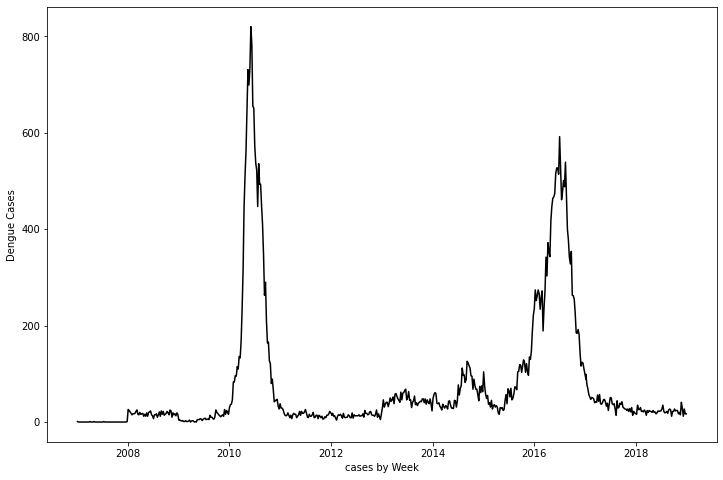

In [38]:
# Dengue cases in time
def timeseries (x_axis, y_axis, x_label):
    plt.figure(figsize = (12, 8))
    plt.plot(x_axis, y_axis, color ='black')
    plt.xlabel(x_label) 
    plt.ylabel('Dengue Cases')

timeseries(merge_cases_temp_precip['LastDayWeek'], merge_cases_temp_precip['cases_medellin'], 'cases by Week')

# Prepare data to supervised learning time series

we will use:
* data: is the dataframe in our case (Dengue Cases, Precipitation and Temperature)
* n_in: is the number of lag weeks in the past (length of window)

The heart of this "series_to_supervised" function is the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html">shift</a> fuction of pandas

This function gets as input the number of periods(in this case the number of weeks represented as rows up or down in the dataframe) to move the columns of a dataframe.
E.g. 
* If we have merge_cases_temp_precip['cases_medellin'].shift(1) all the rows of column cases_medellin will move one row down
* If we have merge_cases_temp_precip['cases_medellin'].shift(-1) all the rows of column cases_medellin will move one row up


In [39]:
#from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from numpy import asarray


# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):   ##
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

In [40]:
# Take Columns that we want
data = merge_cases_temp_precip[['temperature_medellin','percipitation_medellin_rural']]
data['cases_medellin[t]'] = merge_cases_temp_precip[['cases_medellin']]
data  #DF

/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,temperature_medellin,percipitation_medellin_rural,cases_medellin[t]
0,21.009283,14.097693,1
1,21.009283,6.910390,0
2,21.009283,21.616968,0
3,21.009283,0.000000,0
4,20.982925,3.144225,0
...,...,...,...
619,20.936353,8.656351,28
620,20.936353,16.076869,12
621,20.936353,5.388778,27
622,20.936353,2.708024,17


In [41]:
# transform the time series data into supervised learning
# we define 11 lag weeks
lag_weeks = 11

# we have as input 3 columns (temperature, precipitation, Dengue Cases)
# The Result will be 3 x 11 = 33 columns
data = series_to_supervised(data, n_in=lag_weeks)   ##previous six steps

In [42]:
# if we see the resulting dataframe is a dataframe of 33 columns
# first 3 columns are week in t-11 and columns of last week t 
DataFrame(data).head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,21.009283,14.097693,1.0,21.009283,6.910390,0.0,21.009283,21.616968,0.0,21.009283,...,0.0,21.425911,24.933451,0.0,21.425911,44.063033,0.0,21.425911,38.458219,0.0
1,21.009283,6.910390,0.0,21.009283,21.616968,0.0,21.009283,0.000000,0.0,20.982925,...,0.0,21.425911,44.063033,0.0,21.425911,38.458219,0.0,21.425911,95.889804,0.0
2,21.009283,21.616968,0.0,21.009283,0.000000,0.0,20.982925,3.144225,0.0,20.982925,...,0.0,21.425911,38.458219,0.0,21.425911,95.889804,0.0,21.237032,59.080759,1.0
3,21.009283,0.000000,0.0,20.982925,3.144225,0.0,20.982925,12.500652,0.0,20.982925,...,0.0,21.425911,95.889804,0.0,21.237032,59.080759,1.0,21.237032,45.803598,0.0
4,20.982925,3.144225,0.0,20.982925,12.500652,0.0,20.982925,0.005340,0.0,20.982925,...,0.0,21.237032,59.080759,1.0,21.237032,45.803598,0.0,21.237032,60.837236,0.0


In [43]:
# all the rows except last (Dengue Cases in week t) could be taken as fetures to train Machine Learning Models
features_set = DataFrame(data[:,:-1])
features_set

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,21.009283,14.097693,1.0,21.009283,6.910390,0.0,21.009283,21.616968,0.0,21.009283,...,33.241178,0.0,21.425911,24.933451,0.0,21.425911,44.063033,0.0,21.425911,38.458219
1,21.009283,6.910390,0.0,21.009283,21.616968,0.0,21.009283,0.000000,0.0,20.982925,...,24.933451,0.0,21.425911,44.063033,0.0,21.425911,38.458219,0.0,21.425911,95.889804
2,21.009283,21.616968,0.0,21.009283,0.000000,0.0,20.982925,3.144225,0.0,20.982925,...,44.063033,0.0,21.425911,38.458219,0.0,21.425911,95.889804,0.0,21.237032,59.080759
3,21.009283,0.000000,0.0,20.982925,3.144225,0.0,20.982925,12.500652,0.0,20.982925,...,38.458219,0.0,21.425911,95.889804,0.0,21.237032,59.080759,1.0,21.237032,45.803598
4,20.982925,3.144225,0.0,20.982925,12.500652,0.0,20.982925,0.005340,0.0,20.982925,...,95.889804,0.0,21.237032,59.080759,1.0,21.237032,45.803598,0.0,21.237032,60.837236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,21.347202,25.033699,12.0,21.347202,45.424763,22.0,21.347202,114.186801,22.0,20.748416,...,23.418052,20.0,20.886703,74.504343,15.0,20.886703,62.428213,41.0,20.936353,8.656351
609,21.347202,45.424763,22.0,21.347202,114.186801,22.0,20.748416,76.193731,27.0,20.748416,...,74.504343,15.0,20.886703,62.428213,41.0,20.936353,8.656351,28.0,20.936353,16.076869
610,21.347202,114.186801,22.0,20.748416,76.193731,27.0,20.748416,29.864676,23.0,20.748416,...,62.428213,41.0,20.936353,8.656351,28.0,20.936353,16.076869,12.0,20.936353,5.388778
611,20.748416,76.193731,27.0,20.748416,29.864676,23.0,20.748416,53.085849,24.0,20.748416,...,8.656351,28.0,20.936353,16.076869,12.0,20.936353,5.388778,27.0,20.936353,2.708024


In [44]:
# Last column (Dengue Cases in week t) is our target variable, so last column will be our labels
labels_set = DataFrame(data[:,-1])
labels_set

,0
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
608,28.0
609,12.0
610,27.0
611,17.0


### Train - test Split

In [45]:
# We need a sequence so we can't split randomly
# To divide into Train (90%) and test (10%) to do that we need to know the 90% of the total dataframe
size = features_set.shape[0]
split = int(size*(9/10))

#### Train

In [46]:
# We will train with 1st 90% of data and test with last 10%
features_train = features_set[:split]  ##90% train of 618  ##556  up to 90% -> first 90%
targets_train = labels_set[:split]

#### Test

In [47]:
features_test = features_set[split:]  ##10% test
targets_test = labels_set[split:]

## Random Forest

### Model train

In [48]:
from sklearn.ensemble import RandomForestRegressor

# model
model = RandomForestRegressor(random_state=0,n_estimators=100)
model.fit(features_train, targets_train)   ## fit on training data

/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(random_state=0)

### Model Test

In [49]:
# Use the model to predict with test data
prediction = model.predict(features_test)
prediction

array([31.02, 29.9 , 25.08, 31.41, 19.78, 29.45, 18.44, 34.5 , 18.73,
       24.34, 18.72, 17.28, 35.17, 21.13, 28.7 , 34.24, 20.28, 22.04,
       20.43, 19.86, 16.98, 17.51, 17.67, 16.14, 16.75, 16.03, 15.62,
       15.11, 16.93, 17.58, 17.64, 15.52, 15.62, 17.7 , 17.39, 18.09,
       21.1 , 33.22, 37.38, 22.72, 23.09, 19.14, 19.71, 16.4 , 18.95,
       28.34, 19.89, 16.65, 16.71, 17.19, 27.86, 19.42, 18.17, 17.19,
       18.59, 15.97, 16.84, 39.14, 36.47, 22.86, 30.45, 18.84])

In [50]:
targets_test

,0
551,27.0
552,24.0
553,27.0
554,22.0
555,28.0
...,...
608,28.0
609,12.0
610,27.0
611,17.0


In [51]:
from sklearn.metrics import mean_absolute_error
# Calculate MAE
print(f"the mean absolute error is: {mean_absolute_error(targets_test, prediction)}")

the mean absolute error is: 6.352419354838708


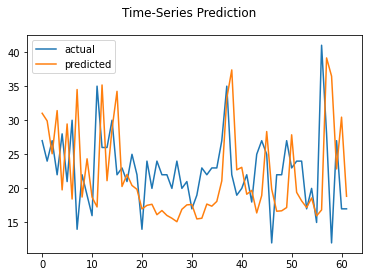

In [52]:
# Plot Actual data vs Predicted
data_predict = prediction  ## predicted target  cases
dataY_plot = targets_test.to_numpy()  ##  real test-target cases

data_predict = data_predict.reshape(len(data_predict), 1)
dataY_plot = dataY_plot.reshape(len(dataY_plot), 1)

import matplotlib.pyplot as plt

plt.plot(dataY_plot, label = 'actual')
plt.plot(data_predict, label = 'predicted')
plt.legend(loc="upper left")

plt.suptitle('Time-Series Prediction')
plt.show()

## Features importance

In [53]:
# See feature importances of Random Forest
features_importance = model.feature_importances_

features_dic = {}
features=['temperature', 'precipitation', 'Dengue_cases']
t = 11
feature = 0

for i in range(0,len(features_importance)):
    if feature == 3:
        feature = 0
        t = t - 1 
    features_dic[features[feature]+" Week-"+str(t)] = features_importance[i]
    feature += 1
#features_dic

In [54]:
sort_orders = sorted(features_dic.items(), key=lambda x: x[1], reverse=True)
sort_orders

[('Dengue_cases Week-1', 0.9615855735055441),
 ('Dengue_cases Week-2', 0.01500840683761811),
 ('Dengue_cases Week-11', 0.0032945656148187464),
 ('precipitation Week-11', 0.0014601465323418287),
 ('temperature Week-10', 0.0011902288279111715),
 ('precipitation Week-0', 0.0011619136415154305),
 ('temperature Week-9', 0.0011223946740294545),
 ('Dengue_cases Week-10', 0.0010571519142805752),
 ('Dengue_cases Week-3', 0.000987623511607758),
 ('precipitation Week-5', 0.0008284552840037853),
 ('precipitation Week-2', 0.0008156374764270285),
 ('precipitation Week-9', 0.0007084937677058725),
 ('temperature Week-11', 0.0007040224171833297),
 ('precipitation Week-3', 0.0006743922477776288),
 ('precipitation Week-4', 0.0006486999022642645),
 ('temperature Week-4', 0.0006362457922498515),
 ('precipitation Week-10', 0.0006203825417989397),
 ('temperature Week-0', 0.0005922827214601643),
 ('precipitation Week-1', 0.000583577530821369),
 ('Dengue_cases Week-5', 0.0005773844809564525),
 ('precipitation 

In [55]:
"""
import matplotlib.pyplot as plt
plt.pie(range(len(features_dic)), list(features_dic.values()))
plt.xticks(range(len(features_dic)), list(features_dic.keys()))
plt.show()
"""

'\nimport matplotlib.pyplot as plt\nplt.pie(range(len(features_dic)), list(features_dic.values()))\nplt.xticks(range(len(features_dic)), list(features_dic.keys()))\nplt.show()\n'

## Bayesian Ridge Regression

### Model train

In [56]:
from sklearn.linear_model import BayesianRidge

# model
model = BayesianRidge()
model.fit(features_train, targets_train)   ## fit on training data

/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BayesianRidge()

### Model Test

In [57]:
prediction = model.predict(features_test)
prediction

array([26.27895235, 18.66472539, 28.77480382, 27.83157519, 16.20680583,
       30.72874697, 23.69545385, 26.76183386, 15.87555037, 25.37475295,
       15.01832889, 15.84421524, 37.57333965, 31.21054483, 26.83874224,
       37.37207923, 24.69072204, 25.17800686, 25.06400266, 29.13391795,
       24.78830233, 16.82457939, 24.99780397, 25.09895992, 31.08919488,
       26.84226448, 22.1670289 , 23.34761103, 28.7883693 , 18.85333848,
       21.52626556, 18.88061598, 18.75469016, 18.95532566, 19.29054477,
       22.4009643 , 24.90915909, 25.80787602, 32.25355252, 23.09940834,
       24.08868255, 19.34985001, 21.81998629, 22.6005381 , 28.21192228,
       28.37189889, 32.80123255, 18.77102141, 17.50627747, 20.71679784,
       37.31317718, 27.17293485, 18.82900402, 26.02945007, 23.73038478,
       12.27627111,  8.96724209, 43.92515142, 34.41686651, 10.49077808,
       23.17866183, 20.26707724])

In [58]:
from sklearn.metrics import mean_absolute_error

print(f"the mean absolute error is: {mean_absolute_error(targets_test, prediction)}")

the mean absolute error is: 6.7051232818033375


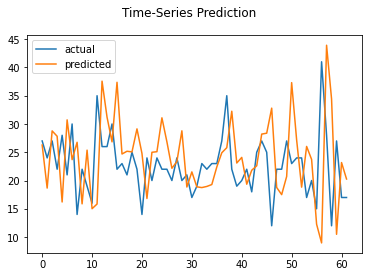

In [59]:
data_predict = prediction  ## predicted target  cases
dataY_plot = targets_test.to_numpy()  ##  real test-target cases

data_predict = data_predict.reshape(len(data_predict), 1)
dataY_plot = dataY_plot.reshape(len(dataY_plot), 1)

import matplotlib.pyplot as plt

plt.plot(dataY_plot, label = 'actual')
plt.plot(data_predict, label = 'predicted')
plt.legend(loc="upper left")

plt.suptitle('Time-Series Prediction')
plt.show()

In [60]:
#model.feature_importances_

## Multilayer Perceptron

### Model train

In [61]:
from sklearn.neural_network import MLPRegressor
#import random
#random.seed(4)

# model
model = MLPRegressor(hidden_layer_sizes=60,random_state=1, max_iter=400)
model.fit(features_train, targets_train)   ## fit on training data

""" hidden_layer_sizes=60, activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000 """

/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


" hidden_layer_sizes=60, activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000 "

### Model Test

In [62]:
prediction = model.predict(features_test)
prediction

array([28.80492399, 21.61972631, 28.32988534, 32.50083961, 21.90188019,
       27.03171186, 31.33679197, 26.80566218, 23.53896258, 25.99598129,
       17.98778419, 18.49024716, 30.65381104, 31.04044797, 27.44912673,
       35.92780149, 25.24466495, 28.23537519, 26.22991557, 27.52635269,
       24.61269602, 18.02744275, 20.28077157, 27.18876848, 31.34275842,
       30.63179723, 13.90890617, 20.92958855, 25.97073463, 23.41131866,
       21.35139524, 23.37138601, 18.60503705, 22.47748613, 29.34345086,
       23.67018885, 21.92310953, 22.51937551, 32.31711352, 22.65071072,
       23.45150442, 19.8417603 , 20.8809023 , 22.53447713, 26.1737109 ,
       28.44769038, 31.61170582, 19.25040219, 17.24364321, 22.01511079,
       34.58081439, 27.99925973, 18.81695534, 25.48211964, 23.18688644,
       17.73546311, 20.50108763, 33.78339065, 35.08343912, 20.61632109,
       29.05732907, 19.22250783])

In [63]:
from sklearn.metrics import mean_absolute_error

print(f"the mean absolute error is: {mean_absolute_error(targets_test, prediction)}")

the mean absolute error is: 5.99946117114741


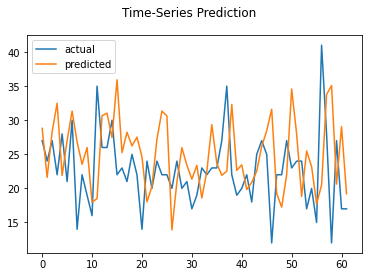

In [64]:
data_predict = prediction  ## predicted target  cases
dataY_plot = targets_test.to_numpy()  ##  real test-target cases

data_predict = data_predict.reshape(len(data_predict), 1)
dataY_plot = dataY_plot.reshape(len(dataY_plot), 1)

import matplotlib.pyplot as plt

plt.plot(dataY_plot, label = 'actual')
plt.plot(data_predict, label = 'predicted')
plt.legend(loc="upper left")

plt.suptitle('Time-Series Prediction')
plt.show()

# Validation Function

The problem with last implementation is that we are testing with last 10% of data, so we don't know how the model will behave under other conditions, such as peaks.

To solve this problem this problem, This Validantion funtion moves the position of test data and calculates the MAE

Iteration 1: 0-10% test && 10%-100% train and calculate the MAE
Iteration 2: 10-20% test && 0%-10% and 20%-100% train and calculate the MAE
Iteration 3: 20-30% test && 0%-20% and 30%-100% train and calculate the MAE
Iteration 4: 30-40% test && 0%-30% and 40%-100% train and calculate the MAE
Iteration 5: 40-50% test && 0%-40% and 50%-100% train and calculate the MAE
...
Iteration 10: 90-100% test && 00%-90% train and calculate the MAE

At the end we return a list of all the MAEs

In [65]:
def validation(features_set,labels_set, model):
    size = features_set.shape[0]
    scores = list()
    for i in range(1,11):
        if (i == 1):
            split = int(size*(1/10))
            # Train
            features_train = features_set[split:]  
            targets_train = labels_set[split:]   
            # Test
            features_test = features_set[:split]  
            targets_test = labels_set[:split]
        elif (i != 10 and i != 1):
            split = int(size*(1/10))
            # Train
            features_train = pd.concat([features_set[:split*(i-1)], features_set[split*(i):]])
            targets_train = pd.concat([labels_set[:split*(i-1)], labels_set[split*(i):]])
            # Test
            features_test = features_set[split*(i-1):split*(i)]  
            targets_test = labels_set[split*(i-1):split*(i)]
        else:
            split = int(size*(9/10))
            # Train
            features_train = features_set[:split]  ## 90% train of 618  ##556  up to 90% -> first 90%
            targets_train = labels_set[:split]        
            # Test
            features_test = features_set[split:]  ## 90% train of 618  ##556  up to 90% -> first 90%
            targets_test = labels_set[split:]
            ## Define the model
        '''
        from sklearn.ensemble import RandomForestRegressor
        # model
        model = RandomForestRegressor(random_state=0,n_estimators=100)
        '''
        # Model train
        model.fit(features_train, targets_train)   ## fit on training data
        # Model test
        prediction = model.predict(features_test)
        from sklearn.metrics import mean_absolute_error
        print(f"the mean absolute error in {i} iteration is: {mean_absolute_error(targets_test, prediction)}")
        scores.append(mean_absolute_error(targets_test, prediction))
    return scores



## Random Forest

In [66]:
from sklearn.ensemble import RandomForestRegressor
# model
model = RandomForestRegressor(random_state=0,n_estimators=100)


scores = validation(features_set = features_set,labels_set = labels_set, model = model)
print(f'the scores are {scores}')
print(f'the mean mae is {sum(scores) / len(scores)}')

/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


the mean absolute error in 1 iteration is: 4.972950819672132


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


the mean absolute error in 2 iteration is: 4.206065573770491


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


the mean absolute error in 3 iteration is: 49.739508196721324


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


the mean absolute error in 4 iteration is: 8.94704918032787


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


the mean absolute error in 5 iteration is: 4.932131147540982


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


the mean absolute error in 6 iteration is: 8.168852459016392


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


the mean absolute error in 7 iteration is: 12.273606557377052


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


the mean absolute error in 8 iteration is: 26.683934426229506


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


the mean absolute error in 9 iteration is: 14.49934426229508


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


the mean absolute error in 10 iteration is: 6.352419354838708
the scores are [4.972950819672132, 4.206065573770491, 49.739508196721324, 8.94704918032787, 4.932131147540982, 8.168852459016392, 12.273606557377052, 26.683934426229506, 14.49934426229508, 6.352419354838708]
the mean mae is 14.077586197778952


## Bayesian Ridge Regression

In [67]:
from sklearn.linear_model import BayesianRidge

# model
model = BayesianRidge()

scores = validation(features_set = features_set,labels_set = labels_set, model = model)
print(f'the scores are {scores}')
print(f'the mean mae is {sum(scores) / len(scores)}')

the mean absolute error in 1 iteration is: 4.086056111005182
the mean absolute error in 2 iteration is: 4.0925767872868235
the mean absolute error in 3 iteration is: 28.926325915311583
the mean absolute error in 4 iteration is: 7.5546047132666105
the mean absolute error in 5 iteration is: 5.716353886325894
the mean absolute error in 6 iteration is: 9.132849436960175
the mean absolute error in 7 iteration is: 13.105583948784881
the mean absolute error in 8 iteration is: 24.504754517626314
the mean absolute error in 9 iteration is: 15.757546708189865
the mean absolute error in 10 iteration is: 6.7051232818033375
the scores are [4.086056111005182, 4.0925767872868235, 28.926325915311583, 7.5546047132666105, 5.716353886325894, 9.132849436960175, 13.105583948784881, 24.504754517626314, 15.757546708189865, 6.7051232818033375]
the mean mae is 11.958177530656066


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConv

In [68]:
from sklearn.neural_network import MLPRegressor
#import random
#random.seed(4)

# model
model = MLPRegressor(hidden_layer_sizes=60,random_state=1, max_iter=400)


scores = validation(features_set = features_set,labels_set = labels_set, model = model)
print(f'the scores are {scores}')
print(f'the mean mae is {sum(scores) / len(scores)}')

/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


the mean absolute error in 1 iteration is: 6.396622638638069


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


the mean absolute error in 2 iteration is: 5.287762941951866


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


the mean absolute error in 3 iteration is: 41.846418034401786
the mean absolute error in 4 iteration is: 7.944003025528981


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


the mean absolute error in 5 iteration is: 5.57247737982982


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


the mean absolute error in 6 iteration is: 9.523769237297572


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


the mean absolute error in 7 iteration is: 12.896054540793292


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


the mean absolute error in 8 iteration is: 28.824720084829504
the mean absolute error in 9 iteration is: 15.866251753793076


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


the mean absolute error in 10 iteration is: 5.99946117114741
the scores are [6.396622638638069, 5.287762941951866, 41.846418034401786, 7.944003025528981, 5.57247737982982, 9.523769237297572, 12.896054540793292, 28.824720084829504, 15.866251753793076, 5.99946117114741]
the mean mae is 14.015754080821136


# Cross Validation

Similar to the previous function we can use cross validation function of sklearn (The problem is that this approach could be more difficult to compare when we see other types of models like LSTM)

## Random Forest

In [69]:
from sklearn.model_selection import cross_val_score

model = RandomForestRegressor(random_state=0,n_estimators=100)

scores = cross_val_score(model, features_set, labels_set, cv=10, scoring='neg_mean_absolute_error')
scores = abs(scores)

print(f'the scores are: {abs(scores)}')
print(f'the mean mae is: {sum(scores) / len(scores)}')

/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/davidrestrepo/opt/

the scores are: [ 5.10145161  4.64612903 50.92983871  7.2252459   5.24245902  8.36836066
 12.78       28.35016393 13.35        6.42278689]
the mean mae is: 14.241643574828135


## Bayesian Ridge Regression

In [70]:
from sklearn.model_selection import cross_val_score

# model
model = BayesianRidge()

scores = cross_val_score(model, features_set, labels_set, cv=10, scoring='neg_mean_absolute_error')
scores = abs(scores)

print(f'the scores are: {abs(scores)}')
print(f'the mean mae is: {sum(scores) / len(scores)}')

the scores are: [ 4.03112451  4.06624558 31.01644226  6.24745235  5.84809515  8.97269342
 13.64095053 26.12346249 12.79801242  6.80320072]
the mean mae is: 11.954767941216181


/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConv

## Multilayer Perceptron

In [71]:
from sklearn.model_selection import cross_val_score

model = MLPRegressor(hidden_layer_sizes=60,random_state=1, max_iter=400)

scores = cross_val_score(model, features_set, labels_set, cv=10, scoring='neg_mean_absolute_error')
scores = abs(scores)

print(f'the scores are: {abs(scores)}')
print(f'the mean mae is: {sum(scores) / len(scores)}')

/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/davidrestrepo/opt/anaconda3/envs/dengue_ML/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perce

the scores are: [ 6.17619562  5.04251534 42.33959955  6.6415862   5.67562345  9.46446255
 13.66810203 31.40100277 14.2995716   5.90094881]
the mean mae is: 14.060960792106405
